In [150]:
import pandas as pd
import cv2
import numpy as np
from os.path import exists    
import matplotlib.pyplot as plt
import pytesseract

In [151]:
pd.set_option('display.max_columns', None)
pd.set_option("colheader_justify", "right")

In [152]:
def ReadingFile():
    read = False
    path = input(r"Please enter the path of the ID: ")
    path = CheckExistence(path)
    while(not read):
        try:
            img = cv2.imread(path)
            read = True
            return (img)
        except:
            path = input(r"Please enter a valid image file path: ")
            path = CheckExistence(path)
def CheckExistence(path):
    while(not exists(path)):
        path = input(r"Please enter a valid file path like 'Drive:\folder1\folder2\example.jpg': ")
    return path

In [153]:
img = ReadingFile()

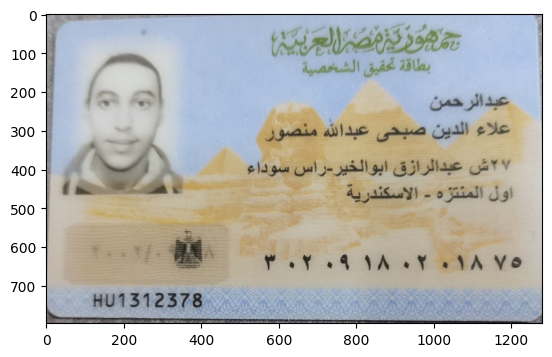

In [154]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [155]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((2,2))

ret, thresh = cv2.threshold(gray
                            , 127, 255
                            ,  cv2.THRESH_BINARY)

In [156]:
laplacian = cv2.Laplacian(thresh, -1,ksize=7)
OLaplacian =laplacian
laplacian = laplacian[int(laplacian.shape[0]/5):laplacian.shape[0]-int(laplacian.shape[1]/6), int(laplacian.shape[1]/3):laplacian.shape[1]]

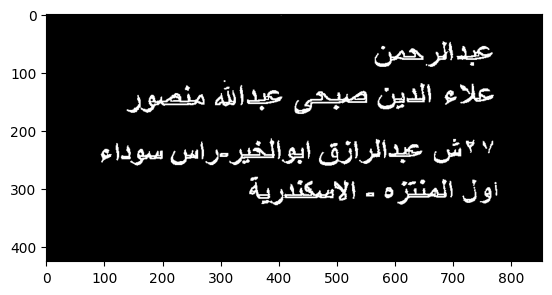

In [157]:
rgb = cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

In [158]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
result = pytesseract.image_to_string(laplacian,lang="ara")

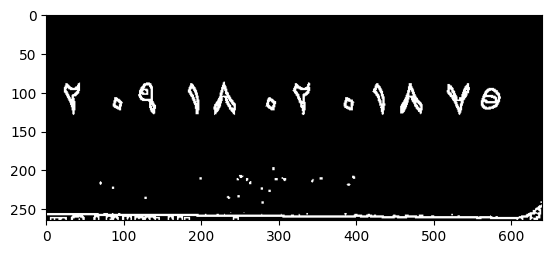

In [159]:
laplacian = OLaplacian[OLaplacian.shape[0]-int(OLaplacian.shape[0]/3):OLaplacian.shape[0],int(OLaplacian.shape[1]/2):OLaplacian.shape[1]]
rgb = cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

In [160]:
numres = pytesseract.image_to_string(laplacian
                                     ,lang="aranumberLayer1")

In [161]:
numres

'43099 6066669469ج63\n'

In [162]:
num, slash = numres.split("\n")

info = []

i=0

for word in result.split("\n"):
    if(word != ""):
        info.append(word)
        i=i+1

data = {"الاسم الاول":info[0],"باقى الاسم":info[1]}

for i in range(2,len(info)):
    add = info[i]
    data.update({f"العنوان {i-1}": [add]})
    
data.update({"الرقم القومي":num})



In [163]:
df = pd.DataFrame.from_dict(data)
df.style.set_table_attributes('style="font-size: 20px"')

,الاسم الاول,باقى الاسم,العنوان 1,العنوان 2,الرقم القومي
0,عبد الرحمن,علاء الدين صيحى عبد الله منصور,""" ""ش عيدالرازق ابوالخير-راس سوداء",اول المنتزه - الاسكندرية,43099 6066669469ج63


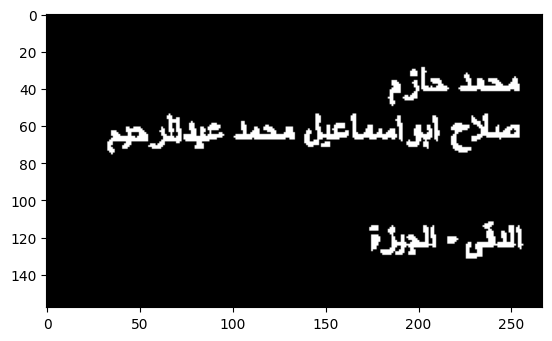

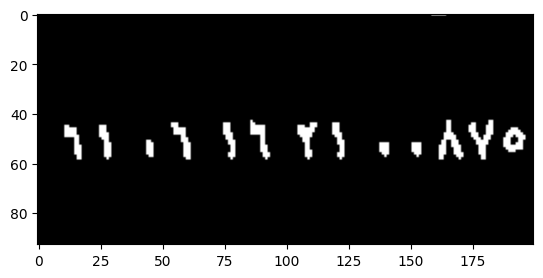

61096 916966100875



,الاسم الاول,باقى الاسم,العنوان 1,الرقم القومي
0,محمد حازم,صلاح ابواسماعيل محمد عيدالرحيم,الدقى - الجيزة,61096 916966100875


In [165]:
img = ReadingFile()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((2,2))

ret, thresh = cv2.threshold(gray
                            , 127, 255
                            ,  cv2.THRESH_BINARY)

laplacian = cv2.Laplacian(thresh, -1,ksize=7)
OLaplacian =laplacian
laplacian = laplacian[int(laplacian.shape[0]/5):laplacian.shape[0]-int(laplacian.shape[1]/6), int(laplacian.shape[1]/3):laplacian.shape[1]]

rgb = cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
result = pytesseract.image_to_string(laplacian,lang="ara")

laplacian = OLaplacian[OLaplacian.shape[0]-int(OLaplacian.shape[0]/3):OLaplacian.shape[0],int(OLaplacian.shape[1]/2):OLaplacian.shape[1]]
rgb = cv2.cvtColor(laplacian, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.show()

numres = pytesseract.image_to_string(laplacian
                                     ,lang="aranumberLayer1")
print(numres)
num, slash = numres.split("\n")

info = []

i=0

for word in result.split("\n"):
    if(word != ""):
        info.append(word)
        i=i+1

data = {"الاسم الاول":info[0],"باقى الاسم":info[1]}

for i in range(2,len(info)):
    add = info[i]
    data.update({f"العنوان {i-1}": [add]})
    
data.update({"الرقم القومي":num})

df = pd.DataFrame.from_dict(data)
df.style.set_table_attributes('style="font-size: 20px"') 